# Pymaceuticals Inc.
---
### Analysis

Pymaceuticals, Inc. recently conducted an animal study on 249 mice with squamous cell carcinoma (SCC) tumors, focusing on the effects of various drug regimens, including the company's drug of interest, Capomulin. The objective of this study was to evaluate the performance of Capomulin against other treatment regimens over 45 days.

Following a data cleansing process, a duplicate mouse (ID g989) was identified, reducing the total number of mice to 248. The gender distribution showed a slightly higher number of male mice compared to female mice.

Capomulin and Ramicane were the most tested drug regimens, while Propriva was the least tested. Analysis of potential outliers revealed no outliers for Capomulin and Ramicane, but one outlier for Infubinol (mouse ID 15 with a tumor volume of 36.321346 mm3) and none for Capomulin ,Ceftamin, and Ramicane.

Box plot analysis indicated that Capomulin and Ramicane were more effective in reducing tumor volume than Infubinol and Ceftamin. The red dot in the Infubinol plot signifies the presence of an outlier.

A scatter plot examining the relationship between mouse weight and average tumor volume demonstrated a positive correlation, indicating that heavier mice tend to have larger tumors. The correlation coefficient was calculated to be 0.84, implying a strong positive relationship between the two variables.

In conclusion, Capomulin emerged as the most effective drug regimen in this study based on mean tumor volume, median tumor volume, tumor volume variance, tumor volume standard deviation, and tumor volume standard error. Capomulin demonstrated the lowest values in these categories, while Zoniferol exhibited the highest values, making it the least effective drug regimen among those tested. Further studies are recommended to confirm these findings and to explore the long-term effects of Capomulin on squamous cell carcinoma in mice.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata,  on='Mouse ID', how='left')
 
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[[x not in duplicated_mice for x in combined_data['Mouse ID']]]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [42]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = cleaned_data['Mouse ID'].nunique()
number_of_mice2

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_st = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_tumor_volume = summary_st.mean()
median_tumor_volume = summary_st.median()
variance_tumor_volume = summary_st.var()
std_dev_tumor_volume = summary_st.std()
sem_tumor_volume = summary_st.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
regimen_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

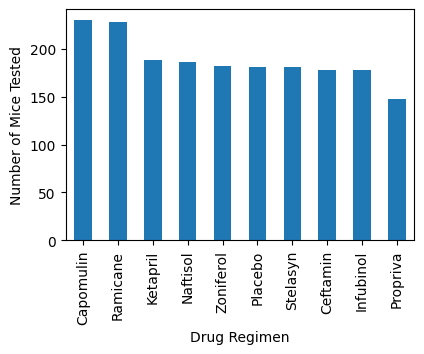

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = cleaned_data.groupby('Drug Regimen')
number_test = drug_regimen ['Timepoint'].count()
timepoints_and_drug_regimen = number_test.sort_values(ascending=False)
timepoints_and_drug_regimen.plot(kind="bar", figsize=(4.5,3),
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")
plt.show()

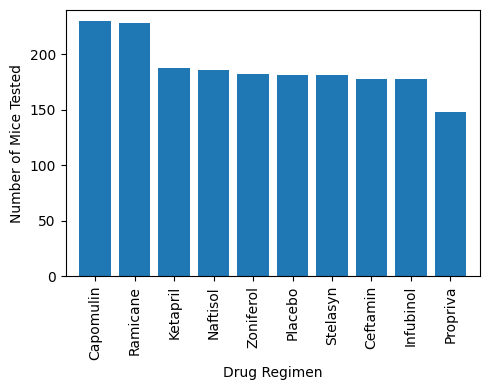

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Group the data by drug regimen and calculate the total number of timepoints
drug_regimen = cleaned_data.groupby('Drug Regimen')
number_test = drug_regimen['Timepoint'].count()
timepoints_and_drug_regimen = number_test.sort_values(ascending=False)

x_axis = timepoints_and_drug_regimen.index
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5, 4))

# Create the bar plot
plt.bar(x_axis, timepoints_and_drug_regimen, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(timepoints_and_drug_regimen) + 10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

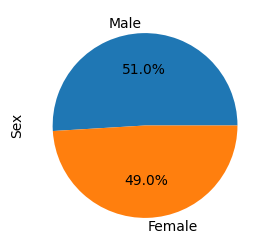

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(5, 3))
sex_distribution = cleaned_data['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.show()


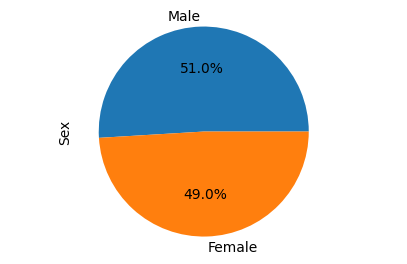

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get the count of each sex
male_count = sex_distribution['Male']
female_count = sex_distribution['Female']
labels = ['Male', 'Female']
sizes = [male_count, female_count]
plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex", y=0.5, labelpad=-45)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')



In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']    
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


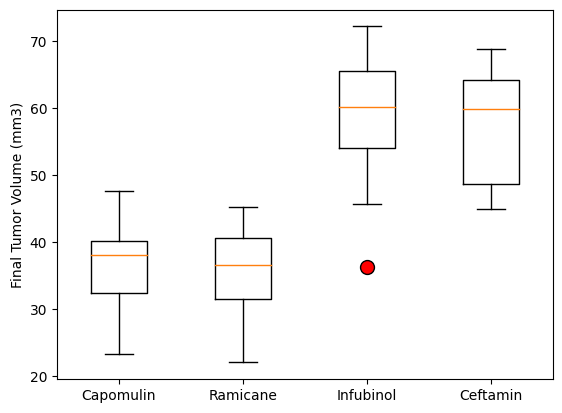

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
red_dot = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')
ax1.boxplot(tumor_vol_data, flierprops=red_dot)
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

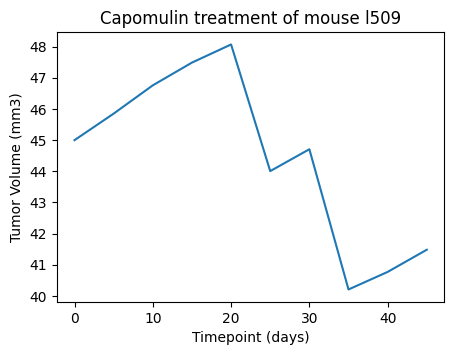

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
specific_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509']
plt.figure(figsize=(5,3.5))
plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


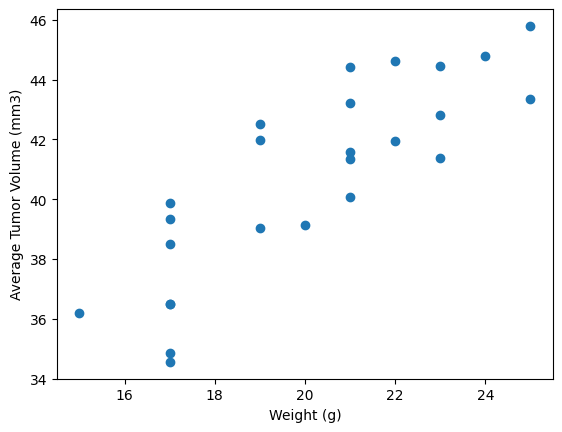

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


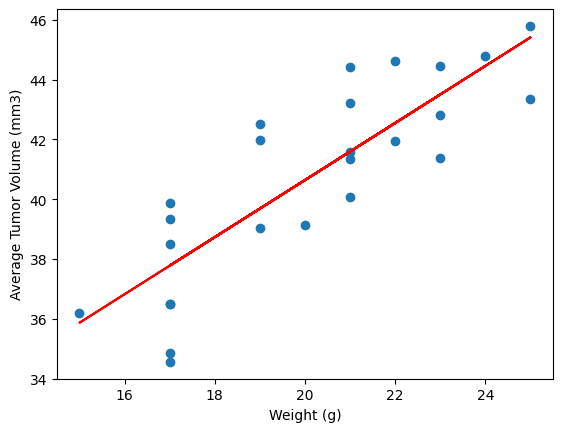

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")
(slope, intercept, r_value, p_value, std_err) = st.linregress(mouse_weight, avg_tumor_vol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
